In [153]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate, optimize
%matplotlib inline 
import math

In [30]:
def integrate_function(fun, arg):
    I = 0
    h = float((arg[-1] - arg[0])/(len(arg) - 1))

    for i, x in enumerate(arg[1:]):
        I += (h)/2*float(fun[i]+fun[i+1])
    return I


# Тестирующий модуль

In [178]:
def test_integrate(fun, a, b, n):
    arg = np.linspace(a, b, num=n)
    
    tab_func = list(map(lambda x:fun(x),arg))
    my_integral = integrate_function(tab_func,arg)
    true_integral = integrate.quad(fun, a, b)
    print("scipy.integrate: %f\nMy integrate module: %f" % (true_integral[0], my_integral))
    print("Difference:%f" % (math.fabs(true_integral[0] - my_integral)))
    return math.fabs(true_integral[0] - my_integral)

In [189]:
def linear(x,a,b):
    return a*x+b

def accuracy(fun, a, b):
    ex = []
    log_arg = [math.log(i*10) for i in range(10, 1000, 10)]

    for x in range(10, 1000, 10):
        arg = np.linspace(a, b, num=x +1)

        tab_func = list(map(lambda x:fun(x),arg))
        my_integral = integrate_function(tab_func,arg)
        true_integral = integrate.quad(fun, a, b)
        
        ex.append(math.log(-true_integral[0] + my_integral))
    plt.plot(log_arg,ex )
    plt.xlabel(u'Count of segments')
    plt.ylabel(u'Error')
    plt.title(u'Error of module')
    
    plt.show()

    print("-k = %f C = %f" % (scipy.optimize.curve_fit(linear, log_arg, ex)[0][0], scipy.optimize.curve_fit(linear, log_arg, ex)[0][1]))

scipy.integrate: 41.666667
My integrate module: 41.675344
Difference:0.008677
scipy.integrate: 0.058502
My integrate module: 0.070983
Difference:0.012481
scipy.integrate: 1.136550
My integrate module: 1.143809
Difference:0.007259


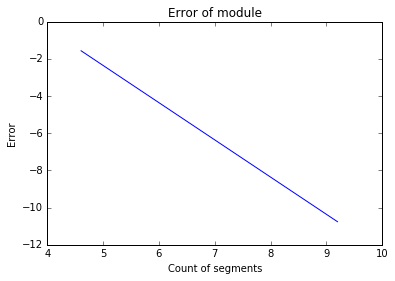

-k = -2.000000 C = 7.641724


In [190]:
test_integrate(lambda x: x*x, 0, 5.0, 50)
test_integrate(lambda x: 100*math.cos(x*3*math.pi)/(x*x+1), -5, 5, 50)
test_integrate(lambda x: math.sin(1/x), 0.01, 2.0, 500)
accuracy(lambda x :x*x , 0, 5)